# **Stock Market Analysis**

In [ ]:
pip install Yahoo-ticker-downloader

     |████████████████████████████████| 51kB 6.4MB/s 
  Created wheel for Yahoo-ticker-downloader: filename=Yahoo_ticker_downloader-3.0.1-cp36-none-any.whl size=10184 sha256=3519d943079fa3de275791d45c1f66551f0727185a4a4a32bff9f4edbb0bfded
  Stored in directory: /root/.cache/pip/wheels/8f/8c/49/2f945a8ef86a6301584099c6a92ec9b40498e497517abb01a0
Successfully built Yahoo-ticker-downloader


In [ ]:
pip install yahoo-finance

     |████████████████████████████████| 133kB 20.1MB/s 
  Created wheel for yahoo-finance: filename=yahoo_finance-1.4.0-cp36-none-any.whl size=7234 sha256=256c57e6c7d4822f79a3ff7d610f4f8069aa70eec98878325799117c44a33fcd
  Stored in directory: /root/.cache/pip/wheels/58/77/5b/66026e0fa7af2ee5926a516a70d3df95e17f952c570bc5aee6
Successfully built yahoo-finance


In [ ]:
from pandas_datareader import DataReader,wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.style as style
style.use('dark_background')
sns.set_style('whitegrid')

from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
#list of stocks used for analysis
#stock_list = ['^NSEI']
#stock_list = ['^NSEBANK']
#stock_list = ['ONGC.NS']

#inserting date
end_date = datetime.now()
#end_date = datetime(2021, 2, 17)
start_date = datetime(2010, 1, 1)

#collecting data from web
for stock in stock_list:
  X = DataReader('^NSEBANK','yahoo', start_date, end_date)

In [ ]:
#viewdata
X =X[:-1]
print(X)

                    High           Low  ...  Volume     Adj Close
Date                                    ...                      
2010-01-04   9129.450195   9031.900391  ...     0.0   9112.349609
2010-01-05   9214.000000   9157.349609  ...     0.0   9192.150391
2010-01-06   9265.549805   9183.650391  ...     0.0   9223.000000
2010-01-07   9261.849609   9153.250000  ...     0.0   9192.950195
2010-01-08   9214.349609   9141.450195  ...     0.0   9160.700195
...                  ...           ...  ...     ...           ...
2021-02-10  36227.199219  35428.148438  ...     0.0  35783.101562
2021-02-11  36009.449219  35573.300781  ...     0.0  35752.101562
2021-02-12  36322.800781  35700.250000  ...     0.0  36108.898438
2021-02-16  37708.750000  36762.750000  ...     0.0  37098.398438
2021-02-17  37331.449219  36764.250000  ...     0.0  36910.949219

[2455 rows x 6 columns]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
#description of the data
X.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2455.000000,2455.000000,2455.000000,2455.000000,2.455000e+03,2455.000000
mean,18184.621208,17869.610591,18040.387689,18027.438277,1.729844e+05,18027.438277
std,7526.615282,7434.653888,7487.260728,7482.771584,5.103801e+06,7482.771584
min,7961.700195,7766.350098,7948.450195,7798.549805,0.000000e+00,7798.549805
25%,11074.350098,10846.075195,10970.474609,10960.200195,0.000000e+00,10960.200195
50%,17598.099609,17203.000000,17446.349609,17373.150391,0.000000e+00,17373.150391
75%,25132.900391,24811.075195,24969.349609,24994.450195,0.000000e+00,24994.450195
max,37708.750000,36764.250000,37492.601562,37098.398438,2.429860e+08,37098.398438


In [ ]:
#information from the data
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2455 entries, 2010-01-04 to 2021-02-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2455 non-null   float64
 1   Low        2455 non-null   float64
 2   Open       2455 non-null   float64
 3   Close      2455 non-null   float64
 4   Volume     2455 non-null   float64
 5   Adj Close  2455 non-null   float64
dtypes: float64(6)
memory usage: 134.3 KB


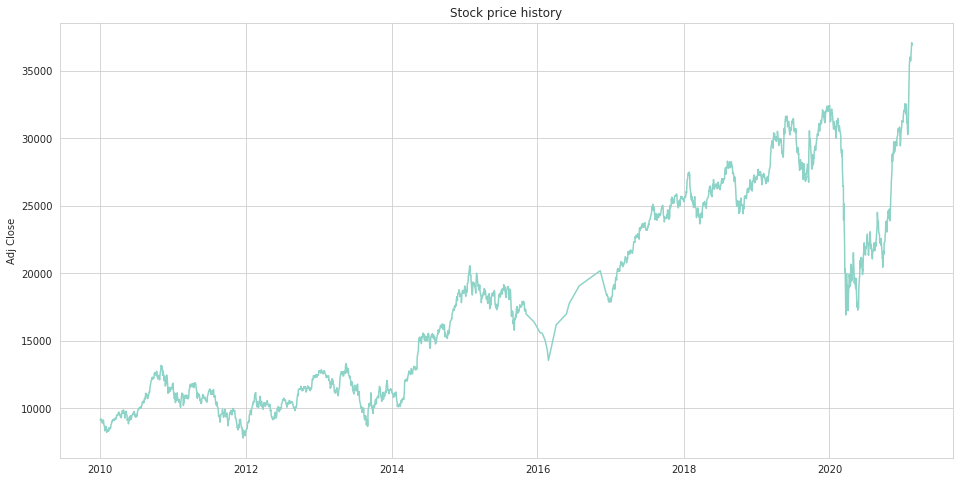

In [ ]:
#ploting the data of stock exchange
plt.figure(figsize=(16, 8))
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title('Stock price history')
plt.plot(X['Adj Close'])
plt.show()

In [ ]:
#create new dataframe with 'adj close column
data= X.filter(['Close'])
#convert dataframe to numpy array
dataset = data.values
#creating the training data
trainData = math.ceil(len(dataset)-1)

trainData

2454

In [ ]:
#Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data.shape



(2455, 1)

In [ ]:

#create scaled training dataset
trained_data = scaled_data[0:trainData, :]

#split the data with xtrain and ytrain
x_train = [] #independent 
y_train = [] #dependent (target)

for i in range(30, len(trained_data)):
  x_train.append(trained_data[i-30:i, 0])
  y_train.append(trained_data[i, 0])
  if i<= 31:
    print(x_train)
    print(y_train)
    


[array([0.04483982, 0.04756341, 0.0486163 , 0.0475907 , 0.04649001,
       0.04692857, 0.04049679, 0.03848313, 0.03796095, 0.03797118,
       0.04418795, 0.0456436 , 0.04531763, 0.03825105, 0.03324593,
       0.03065032, 0.01813149, 0.0213414 , 0.02911278, 0.02903429,
       0.02285338, 0.02844041, 0.02295404, 0.01449496, 0.01855472,
       0.02026974, 0.01677313, 0.01989261, 0.01754789, 0.02045232])]
[0.02569809164369813]
[array([0.04483982, 0.04756341, 0.0486163 , 0.0475907 , 0.04649001,
       0.04692857, 0.04049679, 0.03848313, 0.03796095, 0.03797118,
       0.04418795, 0.0456436 , 0.04531763, 0.03825105, 0.03324593,
       0.03065032, 0.01813149, 0.0213414 , 0.02911278, 0.02903429,
       0.02285338, 0.02844041, 0.02295404, 0.01449496, 0.01855472,
       0.02026974, 0.01677313, 0.01989261, 0.01754789, 0.02045232]), array([0.04756341, 0.0486163 , 0.0475907 , 0.04649001, 0.04692857,
       0.04049679, 0.03848313, 0.03796095, 0.03797118, 0.04418795,
       0.0456436 , 0.04531763, 0.0

In [ ]:
#convert training dataset into numpy array
x_train, y_train =np.array(x_train),np.array(y_train)
x_train.shape
y_train.shape

(2424,)

In [ ]:
#reshape the data as numpy model will expect 3-d data
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))


In [ ]:
#fake create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
2424/2424 - 10s - loss: 0.0014
Epoch 2/10
2424/2424 - 8s - loss: 4.9611e-04
Epoch 3/10
2424/2424 - 9s - loss: 2.9961e-04
Epoch 4/10
2424/2424 - 8s - loss: 2.7109e-04
Epoch 5/10
2424/2424 - 8s - loss: 2.5903e-04
Epoch 6/10
2424/2424 - 8s - loss: 2.3659e-04
Epoch 7/10
2424/2424 - 8s - loss: 2.3586e-04
Epoch 8/10
2424/2424 - 8s - loss: 2.2002e-04
Epoch 9/10
2424/2424 - 8s - loss: 2.1396e-04
Epoch 10/10
2424/2424 - 8s - loss: 2.1450e-04


In [ ]:
#Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compile model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#traindata
model.fit(x_train, y_train, batch_size=128, epochs=500)

Epoch 1/500
20/20 [==============================] - 3s 30ms/step - loss: 0.1206
Epoch 2/500
20/20 [==============================] - 0s 22ms/step - loss: 0.0068
Epoch 3/500
20/20 [==============================] - 0s 22ms/step - loss: 0.0029
Epoch 4/500
20/20 [==============================] - 0s 23ms/step - loss: 0.0013
Epoch 5/500
20/20 [==============================] - 0s 23ms/step - loss: 9.6287e-04
Epoch 6/500
20/20 [==============================] - 0s 22ms/step - loss: 9.5649e-04
Epoch 7/500
20/20 [==============================] - 0s 22ms/step - loss: 9.1155e-04
Epoch 8/500
20/20 [==============================] - 0s 23ms/step - loss: 8.7908e-04
Epoch 9/500
20/20 [==============================] - 0s 23ms/step - loss: 8.0615e-04
Epoch 10/500
20/20 [==============================] - 0s 22ms/step - loss: 8.1942e-04
Epoch 11/500
20/20 [==============================] - 0s 22ms/step - loss: 8.2692e-04
Epoch 12/500
20/20 [==============================] - 0s 23ms/step - loss: 7.47

In [ ]:
#create the testing data
#creating array with scaled values from 2168 to 2218
test_data = scaled_data[trainData - 300: , :]


#create test dataset
x_test = []
y_test=[]
y_test = dataset[trainData:, :] #values to be predicted
for i in range (300,len(test_data)):
  x_test.append(test_data[i-300:i, 0]) #last 50 values
  #y_test.append(test_data[i, 0])

test_data.shape



(301, 1)

In [ ]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#reshaping the data for LSTM with 3-d data
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(1, 300, 1)

In [ ]:
#predict the values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

predictions.shape

(1, 1)

In [ ]:
#RMSE (to see how model performs)
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
rmse

41.69921875

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



KeyError: ignored

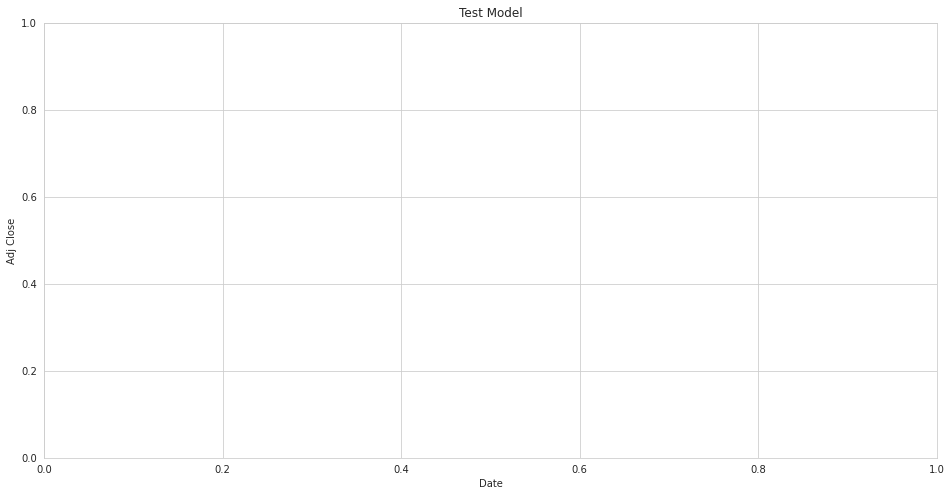

In [ ]:
#plot the data
train = data[:trainData]
valid = data[trainData:]
valid['Predictions'] = predictions

#visualize the data
plt.figure(figsize=(16,8))
plt.title('Test Model')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show

In [ ]:
#show actual and predicted prices
valid

,Close,Predictions
Date,,
2021-02-17,36910.949219,36869.25


In [ ]:
#getting the quote (actual prediction)
apple = DataReader('^NSEBANK', 'yahoo', start = '2010-01-01', end = '2021-02-17')
apple=apple[:-1]
#new dataframe

new_trainData = apple.filter (['Close'])

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(new_trainData)

scaled_data
#get the data history
last_50_days = new_trainData[-300:].values
#scaleing data
last_50_days_scaled = scaler.transform(last_50_days)
#empty list
X_test = []
X_test.append(last_50_days_scaled)
#converting to numpy array
X_test = np.array(X_test)
#reshaping
X_test =np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#model predict
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[36631.266]]


In [ ]:
apple.tail(40)
column_1 = apple1["Adj Close"]
column_2 = apple["High"]
column_3 = apple["Low"]
column_4 = apple["Open"]
correlation2 = column_1.corr(column_2)
correlation3 = column_1.corr(column_3)
correlation4 = column_1.corr(column_4)
print(correlation2)
print(correlation3)
print(correlation4)
column_5 = apple1["new"]
correlation4 = column_1.corr(column_5)
apple['new'] = apple['High'].shift(+1)

apple1=apple[1:]    

apple['diff'] = apple['Close'] - apple['Close'].shift(-1)

NameError: ignored

In [ ]:

from fbprophet import Prophet
apple = DataReader('ONGC.NS', 'yahoo', start = '2010-01-01', end = '2021-02-17')
apple=apple[:-1]

df_confirmed=apple

confirmed = df_confirmed.groupby('Date').sum()['Close'].reset_index()
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

confirmed.tail()



m = Prophet(interval_width=0.95,daily_seasonality=True)
m.fit(confirmed)
future = m.make_future_dataframe(periods=5)
future.tail()


forecast = m.predict(future)


forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)



,ds,yhat,yhat_lower,yhat_upper
2744,2021-02-18,64.434423,39.935443,92.035145
2745,2021-02-19,64.151108,36.506673,91.110563
2746,2021-02-20,66.024885,41.075558,92.806830
2747,2021-02-21,65.673542,39.261177,89.646432
2748,2021-02-22,63.218431,37.861846,86.702930


In [ ]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM


df=apple
#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)


#creating train and test sets
dataset = new_data.values

train = dataset[0:987,:]
valid = dataset[987:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)


rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

927/927 - 6s - loss: 0.0026


ValueError: ignored